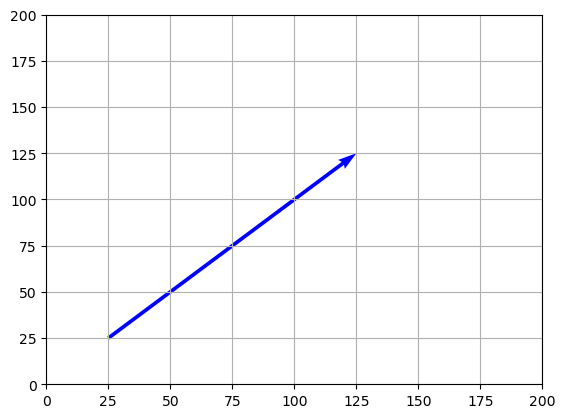

In [16]:

# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
# Vector origin location 
# X = [100, 0] 
# Y = [100, 0] 
# # Directional vectors 
# U = [100, 100]   
# V = [52.916666, 100]   

X = [25]
Y = [25]
U = [100]
V = [100]
# Creating plot 
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1, angles = 'xy', scale_units = 'xy') 

# x-lim and y-lim 
plt.xlim(0, 200) 
plt.ylim(0, 200) 
  
# Show plot with grid 
plt.grid() 
plt.show() 

In [18]:
class SingleVector:
    def __init__(self, xBegin, yBegin, xDelta, yDelta ):
        self.xBegin = float(xBegin)
        self.yBegin = float(yBegin)
        self.xDelta = float(xDelta)
        self.yDelta = float(yDelta)
class VectorFieldImage:
    def  __init__(self, width, height):
        self.width = float(width)
        self.height = float(height)
        self.vectorList = []
    def addVector(self, vectorAdd):
        self.vectorList.append(vectorAdd)
    def printAllVectors(self):
        for vector in self.vectorList:
            
            print(vector.xBegin, vector.yBegin, vector.xEnd, vector.yEnd)
    def graphVectors(self):
        x_begin = []
        y_begin = []
        x_end = []
        y_end = []
        for vector in self.vectorList:
            x_begin.append(vector.xBegin)
            y_begin.append(vector.yBegin)
            x_end.append(vector.xDelta)
            y_end.append(vector.yDelta)
        plt.quiver(x_begin, y_begin, x_end, y_end, color='r', units='xy', scale=1,  angles = 'xy', scale_units = 'xy', width=0.3)
        plt.xlim(0, self.width) 
        plt.ylim(0, self.height) 
        plt.show()


m 10.583334,175.29164 2.645834,2.64583
m 15.875001,175.29164 -3.96875,-1.32292
m 21.166668,180.58331 -2.645833,-2.64584
m 15.875001,180.58331 -1.322916,3.96875
m 10.583334,169.99997 10e-7,3.96875
m 5.2916681,169.99997 2.6458333,3.96875
m 5.2916681,175.29164 3.96875,3.96875
m 10.583334,180.58331 2.645834,2.64584
m 26.458334,180.58331 -2.645833,2.64583
m 21.166668,185.87497 -3.96875,6.61459
m 15.875001,185.87497 -1.322916,3.96875
m 63.500003,254.66664 2.645833,-5.29166
m 63.500003,259.95831 1.322916,-3.96875
m 58.208336,254.66664 1.322917,-2.64583
m 15.875001,191.16664 1.322917,9.26042
m 21.166668,201.74997 -2.645833,3.96875
m 21.166668,212.33331 -2.645833,3.96875
m 21.166668,207.04164 -1.322917,3.96875
m 68.791669,254.66664 -1.322916,-5.29166
M 52.91667,270.54164 47.625,273.18748
m 47.625,270.54164 -5.291666,2.64584
m 42.333334,270.54164 -5.291667,2.64584
m 52.91667,275.83331 -3.968753,1.32292
m 47.625,275.83331 -5.291666,1.32292
m 42.333334,275.83331 -5.291667,1.32292
m 47.625,254.6666

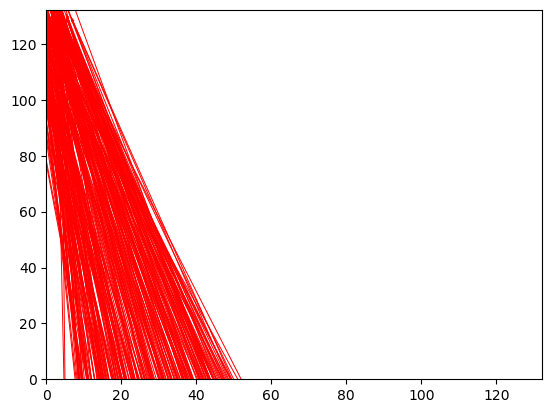

In [ ]:
# Write something to convert one type of vector to another
import xml.etree.ElementTree as ET
tree = ET.parse("drawingInkscape.svg")
root = tree.getroot()

# find all svg namespaces
namespace = {"svg": "http://www.w3.org/2000/svg"}

viewBox = root.get("viewBox")
_, _, width, height = viewBox.split()
baseSVG = VectorFieldImage(width, height)

xOffset = 0.0
yOffset = -164.70831
for path in root.findall(".//svg:path", namespace):
    
    d_value = path.get("d")
    print(d_value)
    split_d_value = d_value.split()
    xBegin, yBegin  = split_d_value[1].split(",")
    xEnd, yEnd = split_d_value[2].split(",")
    if (split_d_value[0] == "M"):
        baseSVG.addVector(SingleVector(xBegin = float(xBegin) + xOffset,
                                    yBegin = (float(height) - (float(yBegin) - yOffset)),
                                    xDelta =  float(xEnd)  - float(xBegin),
                                    yDelta = (float(height) - (float(yEnd) - yOffset)) - (float(height) - (float(yBegin) - yOffset))
                                    ))
    elif (split_d_value[0] == "m"):
        baseSVG.addVector(SingleVector(xBegin = float(xBegin) + xOffset,
                                    yBegin = (float(height) - (float(yBegin) + yOffset)),
                                    xDelta =  float(xEnd)  - float(xBegin),
                                    yDelta = (float(height) - (float(yEnd) + yOffset)) - (float(height) - (float(yBegin) + yOffset))
                                    ))


print(width,height)
baseSVG.graphVectors()

In [15]:
baseSVG.printAllVectors

<bound method VectorFieldImage.printAllVectors of <__main__.VectorFieldImage object at 0x000001C9AF26F490>>

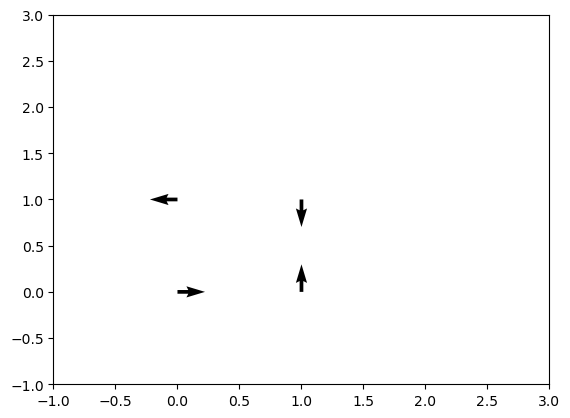